# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import csv
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    
# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#OpenWeather Key

units = "Imperial"

query_url =  f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}"
query_url
weather_data = []
print("Beginning Data Retrieval ")
print("----------------------------")
for city in cities:
    city_url = query_url + "&q=" + city
    response = requests.get(city_url)
    try:
        response_json = response.json()
        #print(response_json)
        lat = response_json['coord']['lat']
        lon = response_json['coord']['lon']
        temp_max = response_json['main']['temp_max']
        humidity = response_json['main']['humidity']
        cloudiness = response_json['clouds']['all']
        wind_speed = response_json['wind']['speed']
        country = response_json['sys']['country']
        date = response_json['dt']
        weather_data.append({"City": city,
                    "Lat": lat,
                    "Lng": lon,
                    "Max Temp": temp_max,
                    "Humidity": humidity,
                    "Cloudiness": cloudiness,
                    "Wind Speed": wind_speed,
                    "Country": country,
                    "Date": date})
        print(f"Processing : {city}")
    except:
        print("City not found. Skipping...")
        
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval 
----------------------------
Processing : puerto ayora
Processing : ushuaia
Processing : jamestown
Processing : busselton
City not found. Skipping...
Processing : georgiyevskoye
Processing : bethel
Processing : bluff
City not found. Skipping...
Processing : kamenka
Processing : sao miguel do araguaia
City not found. Skipping...
Processing : vorokhta
Processing : kuandian
Processing : souillac
Processing : saint-philippe
Processing : bourail
Processing : rikitea
Processing : mbandaka
Processing : qaanaaq
Processing : chapais
City not found. Skipping...
Processing : atuona
Processing : cidreira
Processing : reinosa
Processing : calama
Processing : salalah
Processing : leningradskiy
Processing : shamsabad
Processing : marondera
Processing : sur
City not found. Skipping...
Processing : thompson
Processing : albany
Processing : igarka
Processing : torit
Processing : arraial do cabo
Processing : buraydah
Processing : punta arenas
Processing : khatanga
Processing : m

Processing : nalut
Processing : codrington
Processing : baruun-urt
Processing : vardo
Processing : biak
Processing : kafue
Processing : neopolis
Processing : kihei
Processing : horizontina
Processing : inhambane
Processing : asansol
Processing : ereymentau
Processing : saint george
Processing : terra santa
Processing : bella vista
Processing : beringovskiy
Processing : miyako
Processing : samarai
Processing : welkenraedt
Processing : san juan
Processing : russell
Processing : gallup
Processing : antofagasta
Processing : najran
Processing : bowen
Processing : oliveira
Processing : eydhafushi
Processing : stephenville
Processing : bambous virieux
Processing : kahului
Processing : kulhudhuffushi
Processing : moose factory
Processing : bathsheba
Processing : gondanglegi
Processing : bograd
Processing : fortuna
Processing : moron
Processing : san carlos de bariloche
Processing : pitimbu
Processing : ahipara
Processing : coquimbo
Processing : saint-augustin
Processing : trincomalee
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data_df = pd.DataFrame(weather_data)
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [5]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.74,-90.35,80.01,87,97,8.01,EC,1587606423
1,ushuaia,-54.80,-68.30,39.20,64,100,8.05,AR,1587606510
2,jamestown,42.10,-79.24,32.00,81,90,8.05,US,1587606425
3,busselton,-33.65,115.33,70.00,62,94,5.84,AU,1587606517
4,georgiyevskoye,58.73,45.02,25.56,92,100,11.25,RU,1587606517


In [6]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,19.587487,12.267343,61.065476,68.761221,53.213645,7.653573,1.587607e+09
std,32.841909,90.780228,19.730388,22.684782,38.709850,5.558983,6.403900e+01
min,-54.800000,-179.170000,5.000000,9.000000,0.000000,0.270000,1.587606e+09
25%,-8.350000,-64.620000,45.370000,57.000000,10.000000,3.670000,1.587607e+09
50%,21.400000,15.790000,64.400000,75.000000,58.000000,6.150000,1.587607e+09
75%,47.120000,81.820000,77.650000,86.000000,90.000000,10.290000,1.587607e+09
max,78.220000,179.320000,98.190000,100.000000,100.000000,35.570000,1.587607e+09


In [7]:
city_data_df.to_csv(output_data_file, index_label='City_ID')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

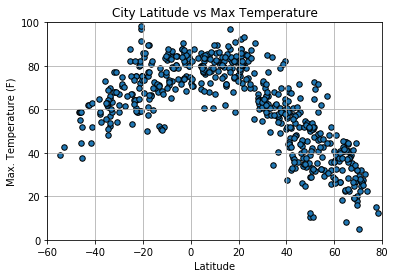

In [8]:
#Create a Scatter Plot for Lattitude vs Temperature of City
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o',s=30, edgecolors= "black")
plt.title("City Latitude vs Max Temperature")

plt.ylim(0,100)
plt.xlim(-60, 80)

plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig("LAT VS TEMP.png")

## Latitude vs. Humidity Plot

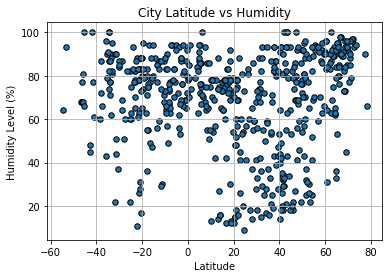

In [9]:
#Create a Scatter Plot for Lattitude vs Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity Level (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('LAT VS HUM.png')

## Latitude vs. Cloudiness Plot

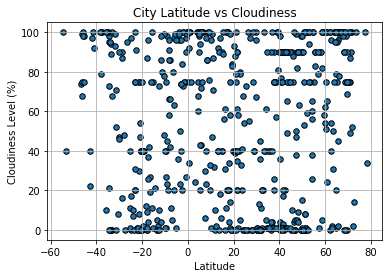

In [10]:
#Create a Scatter Plot for Lattitude vs Cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness Level (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('LAT VS CLOUD.png')

## Latitude vs. Wind Speed Plot

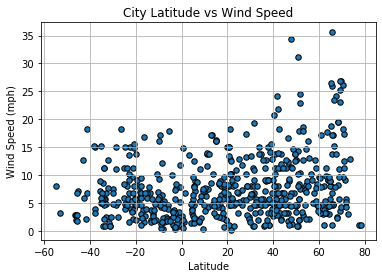

In [11]:
#Create a Scatter Plot for Lattitude vs WindSpeed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('LAT VS WIND.png')

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_reg(x_values,y_values,feature,xy_coord,x_lim,y_lim):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"R squared: {rvalue**2}")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"red")
    plt.annotate(line_eq,xy_coord,fontsize=15,color="red")
    plt.ylim(y_lim)
    plt.xlim(x_lim)
    plt.ylabel(feature)
    plt.xlabel('Latitude')
   

In [13]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemisphere = city_data_df.loc[city_data_df["Lat"]>0.01]
southern_hemisphere = city_data_df.loc[city_data_df["Lat"]<-0.01]

print(northern_hemisphere.head())
southern_hemisphere.head()

             City    Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
2       jamestown  42.10 -79.24     32.00        81          90        8.05   
4  georgiyevskoye  58.73  45.02     25.56        92         100       11.25   
5          bethel  41.37 -73.41     43.00        32           1        5.82   
7         kamenka  51.32  42.77     32.00        88           8        1.99   
9        vorokhta  48.29  24.57     33.64        67           9        1.25   

  Country        Date  
2      US  1587606425  
4      RU  1587606517  
5      US  1587606259  
7      RU  1587606518  
9      UA  1587606518  


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.74,-90.35,80.01,87,97,8.01,EC,1587606423
1,ushuaia,-54.80,-68.30,39.20,64,100,8.05,AR,1587606510
3,busselton,-33.65,115.33,70.00,62,94,5.84,AU,1587606517
6,bluff,-46.60,168.33,59.00,68,74,3.00,NZ,1587606518
8,sao miguel do araguaia,-13.28,-50.16,71.20,86,2,2.06,BR,1587606518


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.7467057507188528


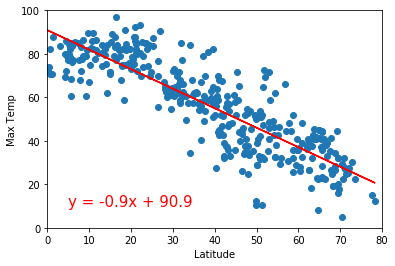

In [14]:
#Create a Scatter Plot for Lattitude vs Temperature of City
x_values = northern_hemisphere['Lat']
#print(x_values)
y_values = northern_hemisphere['Max Temp']
#print(y_values)
xy_coord = (5,10)
x_lim = (0,80)
y_lim = (0,100)
linear_reg(x_values,y_values,'Max Temp',xy_coord,x_lim,y_lim)
plt.savefig("NORTH MAX TEMP VS LAT.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.4387721658542592


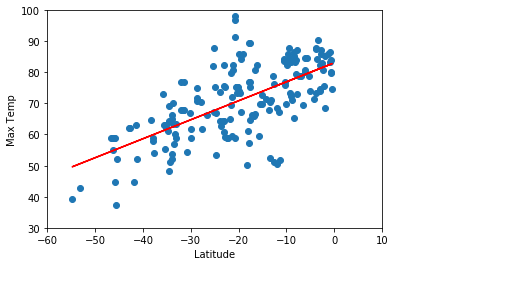

In [15]:
#Create a Scatter Plot for Lattitude vs Temperature of City (Southern Hemisphere)
x_values = southern_hemisphere['Lat']
#print(x_values)
y_values = southern_hemisphere['Max Temp']
#print(y_values)
xy_coord = (6,10)
x_lim = (-60,10)
y_lim = (30,100)
linear_reg(x_values,y_values,'Max Temp',xy_coord,x_lim,y_lim)
plt.savefig("SOUTH MAX TEMP VS LAT.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.04168337413036706


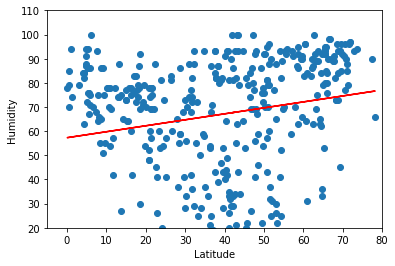

In [16]:
x_values = northern_hemisphere['Lat']
#print(x_values)
y_values = northern_hemisphere['Humidity']
#print(y_values)
xy_coord = (6,10)
x_lim = (-5,80)
y_lim = (20,110)
linear_reg(x_values,y_values,'Humidity',xy_coord,x_lim,y_lim)

plt.savefig("NORTH HUM VS LAT.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.0006323275585074296


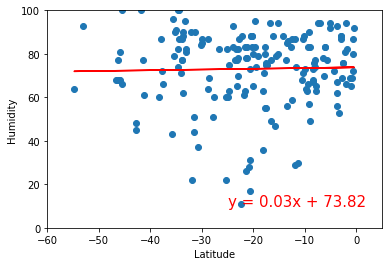

In [17]:
x_values = southern_hemisphere['Lat']
#print(x_values)
y_values = southern_hemisphere['Humidity']
#print(y_values)
xy_coord = (-25,10)
x_lim = (-60,5)
y_lim = (0,100)
linear_reg(x_values,y_values,'Humidity',xy_coord,x_lim,y_lim)

plt.savefig("NORTH HUM VS LAT.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.011840292880215113


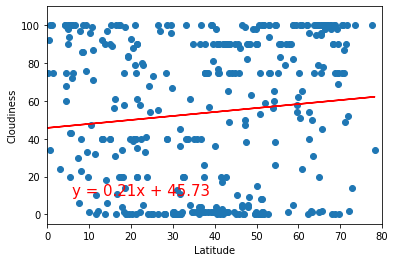

In [18]:
x_values = northern_hemisphere['Lat']
#print(x_values)
y_values = northern_hemisphere['Cloudiness']
#print(y_values)
xy_coord = (6,10)
x_lim = (0,80)
y_lim = (-5,110)
linear_reg(x_values,y_values,'Cloudiness',xy_coord,x_lim,y_lim)
plt.savefig("NORTH CLOUD VS LAT.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.0035342247015465347


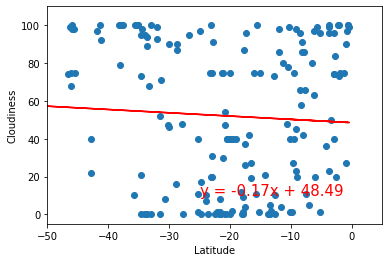

In [19]:
x_values = southern_hemisphere['Lat']
#print(x_values)
y_values = southern_hemisphere['Cloudiness']
#print(y_values)
xy_coord = (-25,10)
x_lim = (-50,5)
y_lim = (-5,110)
linear_reg(x_values,y_values,'Cloudiness',xy_coord,x_lim,y_lim)
plt.savefig("SOUTH CLOUD VS LAT.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.059563545646834616


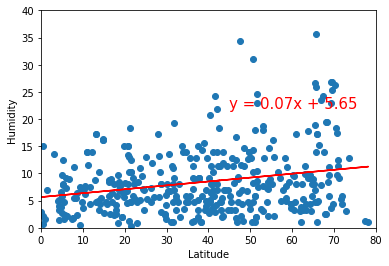

In [20]:
x_values = northern_hemisphere['Lat']
#print(x_values)
y_values = northern_hemisphere['Wind Speed']
#print(y_values)
xy_coord = (45,22)
x_lim = (0,80)
y_lim = (0,40)
linear_reg(x_values,y_values,'Humidity',xy_coord,x_lim,y_lim)

plt.savefig("NORTH WIND VS LAT.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.059563545646834616


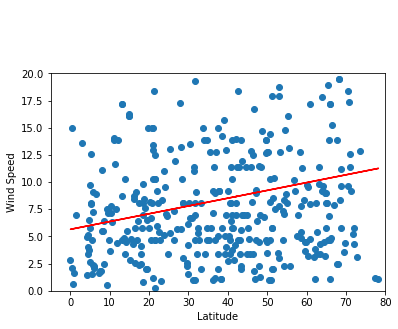

In [21]:
x_values = northern_hemisphere['Lat']
#print(x_values)
y_values = northern_hemisphere['Wind Speed']
#print(y_values)
xy_coord = (-10,25)
x_lim = (-5,80)
y_lim = (0,20)
linear_reg(x_values,y_values,'Wind Speed',xy_coord,x_lim,y_lim)

plt.savefig("NORTH HUM VS LAT.png")